我設定五層，想試看看五層會和課堂上所做的三層有什麼不一樣
<br>另外我設定每層有不同的神經元數量，讓網路逐層壓縮特徵，提高一般化能力

In [62]:
N1 = 128
N2 = 64
N3 = 32
N4 = 32
N5 = 16

## 1. 讀入套件

In [37]:
!pip install gradio

In [38]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

## 2. 讀入 MNIST 數據庫

### 2.1 由 Keras 讀入 MNIST

In [63]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

確認訓練資料是不是有6萬筆、測試資料是不是有1萬筆。

In [64]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


訓練資料有60000筆數據，且為28x28的矩陣，最後希望他能變成 (60000,784)

In [65]:
x_train.shape

(60000, 28, 28)

隨機確認一個訓練資料的樣子(這邊選第9000個)

In [66]:
x_train[9000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41, 239, 253, 253, 253,
        174,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 175, 251, 251, 251, 251,
        173,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  82, 228, 251, 251, 251, 251,
        173,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  10, 137, 251, 251, 236,  92,  18,
         13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 251, 153,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 226,  59,   0,   0,
          0,   0,   0,   0,   0, 109, 155,  96,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 212,   0,   0,   0,
          0,   0,  16, 215, 214, 239, 251, 236, 214,  47,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 119, 251, 251, 212,   0,   0,   0,
         25,  78, 212, 253, 251, 251, 251, 251, 251, 237,  54,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 212,   0,   0,   0,
         78, 251, 251, 253, 251, 251, 251, 251, 251, 251, 215,  63,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 212,   0,   0,  16,
        212, 251, 251, 253, 251, 251, 220, 131, 251, 251, 251, 220,  44,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 253, 253, 213,   0,  37, 224,
        253, 253, 253, 150,   0,   0,   0,   0,   0, 215, 253, 253,  57,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 212,   0, 155, 251,
        251, 251, 160,   0,   0,   0,   0,   0,   0, 214, 251, 251,  57,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 239, 175, 222, 251,
        251, 251,  57,   0,   0,   0,   0,   0, 109, 239, 251, 156,  18,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 251, 251, 251, 251, 251, 251,
        239, 107,   4,   0,   0,   0,  37, 115, 244, 251, 239,  98,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 251, 251, 251, 251,
        173,   0,   0,  23,  98,  98, 240, 251, 251, 243, 107,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 251, 251, 251, 251,
        221, 155, 155, 179, 251, 251, 251, 251, 251, 231,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   9,  37, 172, 249, 251, 251, 251,
        251, 251, 251, 253, 251, 237, 231, 156,  37,  35,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 161, 203, 251, 251,
        251, 251, 251, 174, 173,  53,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 199, 251,
        251, 251, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36,  72,
        190,  57,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [67]:
y_train[3]

1

### 2.3 輸入格式整理

原本的每筆數據是個 28x28 的array,要改成28x28=784長的向量餵給神經網路。所以要 `reshape`(因為是0~255，要壓到零中間所以除以255)

In [68]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

確認整理後訓練資料的樣子

In [69]:
x_train.shape

(60000, 784)

### 2.4 輸出格式整理


In [70]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

隨機確認某筆數據的樣子，這邊選第40筆

In [71]:
y_train[40]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

## 3. 打造第一個神經網路

函數如下

$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}^{10}$$


### 3.2 建構神經網路

開一個空的神經網路。

In [72]:
model = Sequential()

每次用 `add` 去加一層, 從第一個隱藏層開始，因為我設定五層所以加了五次，activation function用relu

In [73]:
model.add(Dense(N1, input_dim=784, activation='relu'))

In [74]:
model.add(Dense(N2, activation='relu'))

In [75]:
model.add(Dense(N3, activation='relu'))

In [76]:
model.add(Dense(N4, activation='relu'))

In [77]:
model.add(Dense(N5, activation='relu'))

最後用softmax

In [78]:
model.add(Dense(10, activation='softmax'))

### 3.3 組裝

* loss function用 `Cross-Entrop`(因為對於分類問題而言，使用Cross-Entrop能夠最大化模型對正確類別的機率，並有效區分不同類別的樣本)
* 決定 optimizer, 我用標準的 SGD (SGD是指隨機的gradient descent，也就是每次都隨機的順序來作訓練)
* 設定 learning rate為0.01(經過其他設定0.05、0.1等等發現出來的結果都差不多97%多)



In [119]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

## 4. 檢視神經網路

### 4.1model 的 summary

In [120]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,570 (439.73 KB)

 Trainable params: 112,570 (439.73 KB)

 Non-trainable params: 0 (0.00 B)

## 5. 訓練神經網路

* 設定一次要訓練幾筆資料 (`batch_size`)，我這邊設128 (也有設成比較小的64等但發現怎麼跑都差不多97%多)
* 設定這 6 萬筆資料一共要訓練幾次 (`epochs`)我這邊設100，也有設成50-100間等但發現怎麼跑都差不多97%多)
<br>最後得到97%多的正確率<br>
這邊有問chatgpt要怎麼做提高正確率，他的回答如下：<br>
在許多標準資料集（如 MNIST 手寫數字辨識），使用基本的全連接神經網路（MLP）通常很難突破 98%，如果你用的是 MNIST，97% 其實已經接近全連接神經網路的極限。
更高的準確率通常需要更深層的模型，或者使用卷積神經網路（CNN）。<br>
因此我認為目前的97%多的結果已經差不多極限

In [121]:
model.fit(x_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 8.1729e-06
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 8.1922e-06
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 8.3883e-06
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.4114e-06
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.2136e-06
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.1164e-06
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.3595e-06
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.3506e-06
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.9538e-06
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.2886e-06
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.2120e-

## 6. 試用我們的結果

In [122]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9669 - loss: 0.3713


In [123]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 97.15%


"predict" 放的是神經網路的學習結果。用 argmax 找到數值最大的那一項。

In [124]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [125]:
predict

array([7, 2, 1, ..., 4, 5, 6])

`x_test` 每筆資料已經換成 784 維的向量, 我們要調整回 28x28 的矩陣才能當成圖形顯示

In [126]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [127]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

測試資料總狀況

In [129]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.3713


In [130]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.31543245911598206
正確率 0.9714999794960022


### 7. 用 Gradio 來展示

In [131]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [132]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [133]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bcfe64e92487e64ca1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bcfe64e92487e64ca1.gradio.live


### 8.最後是我自己用Gradio測試出的結果：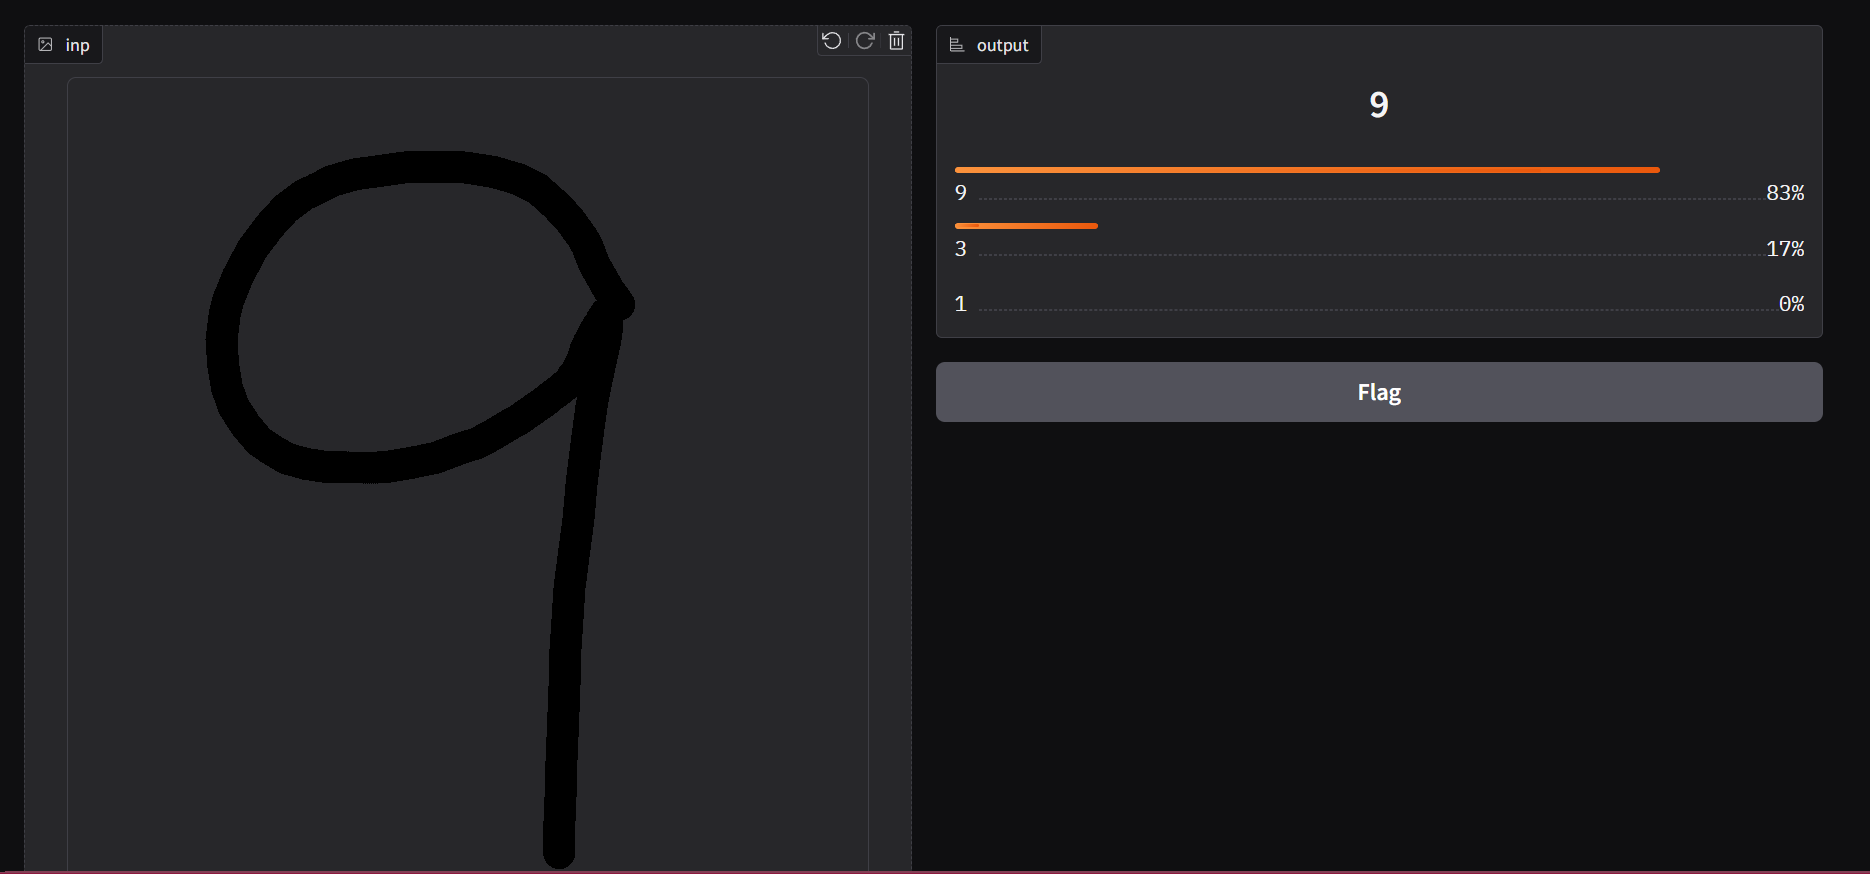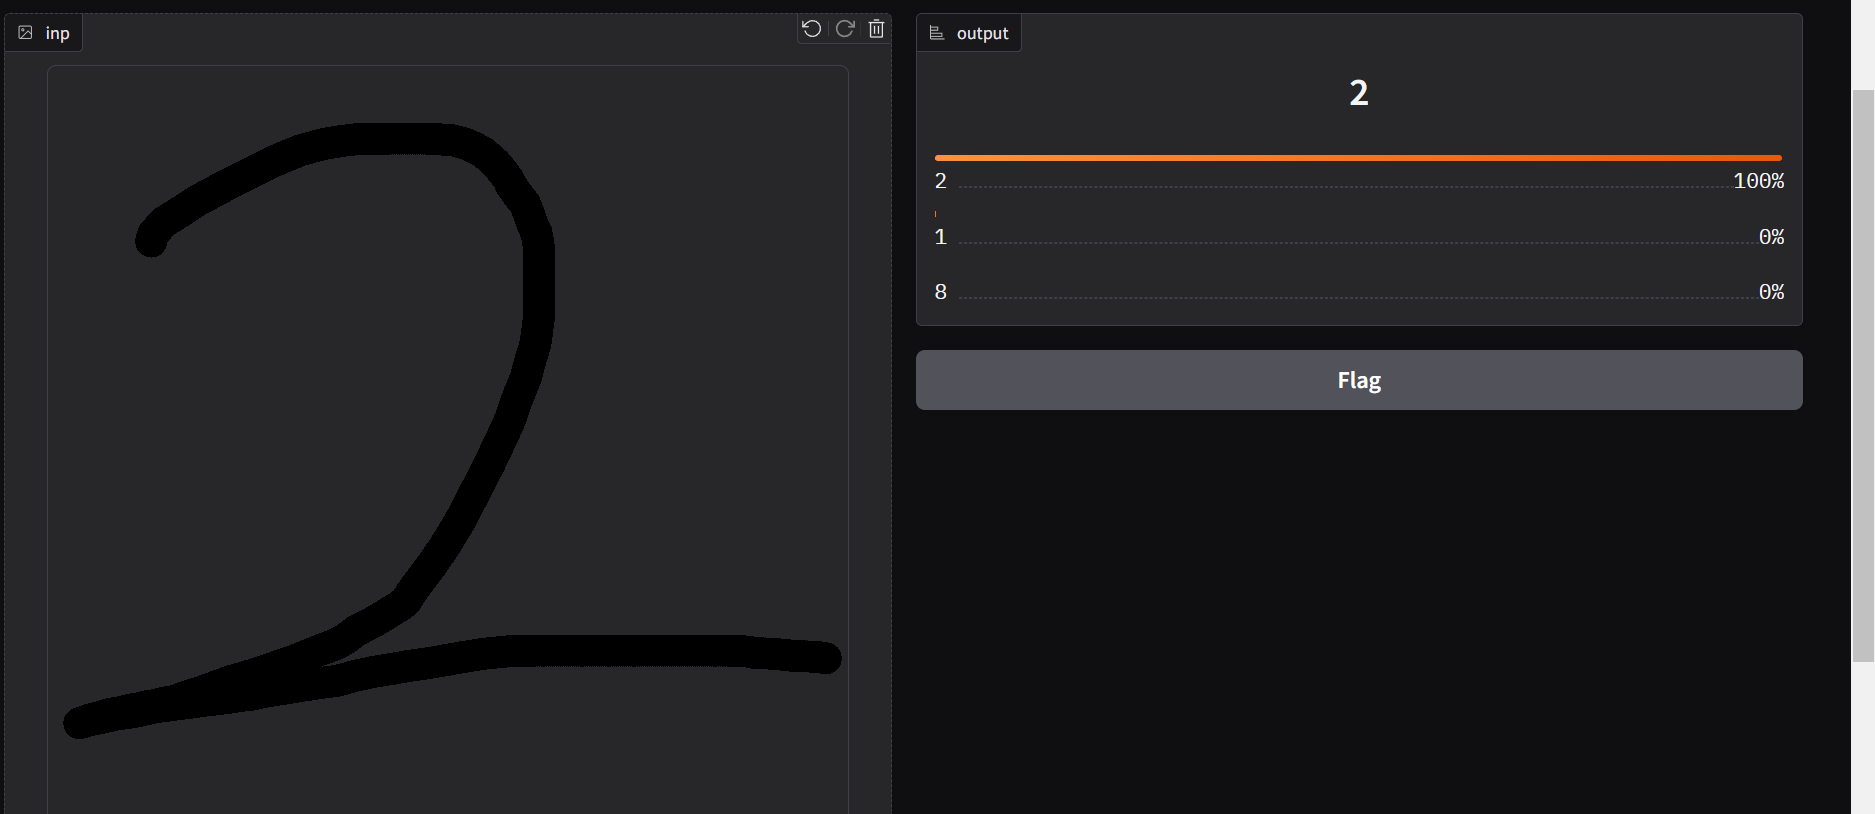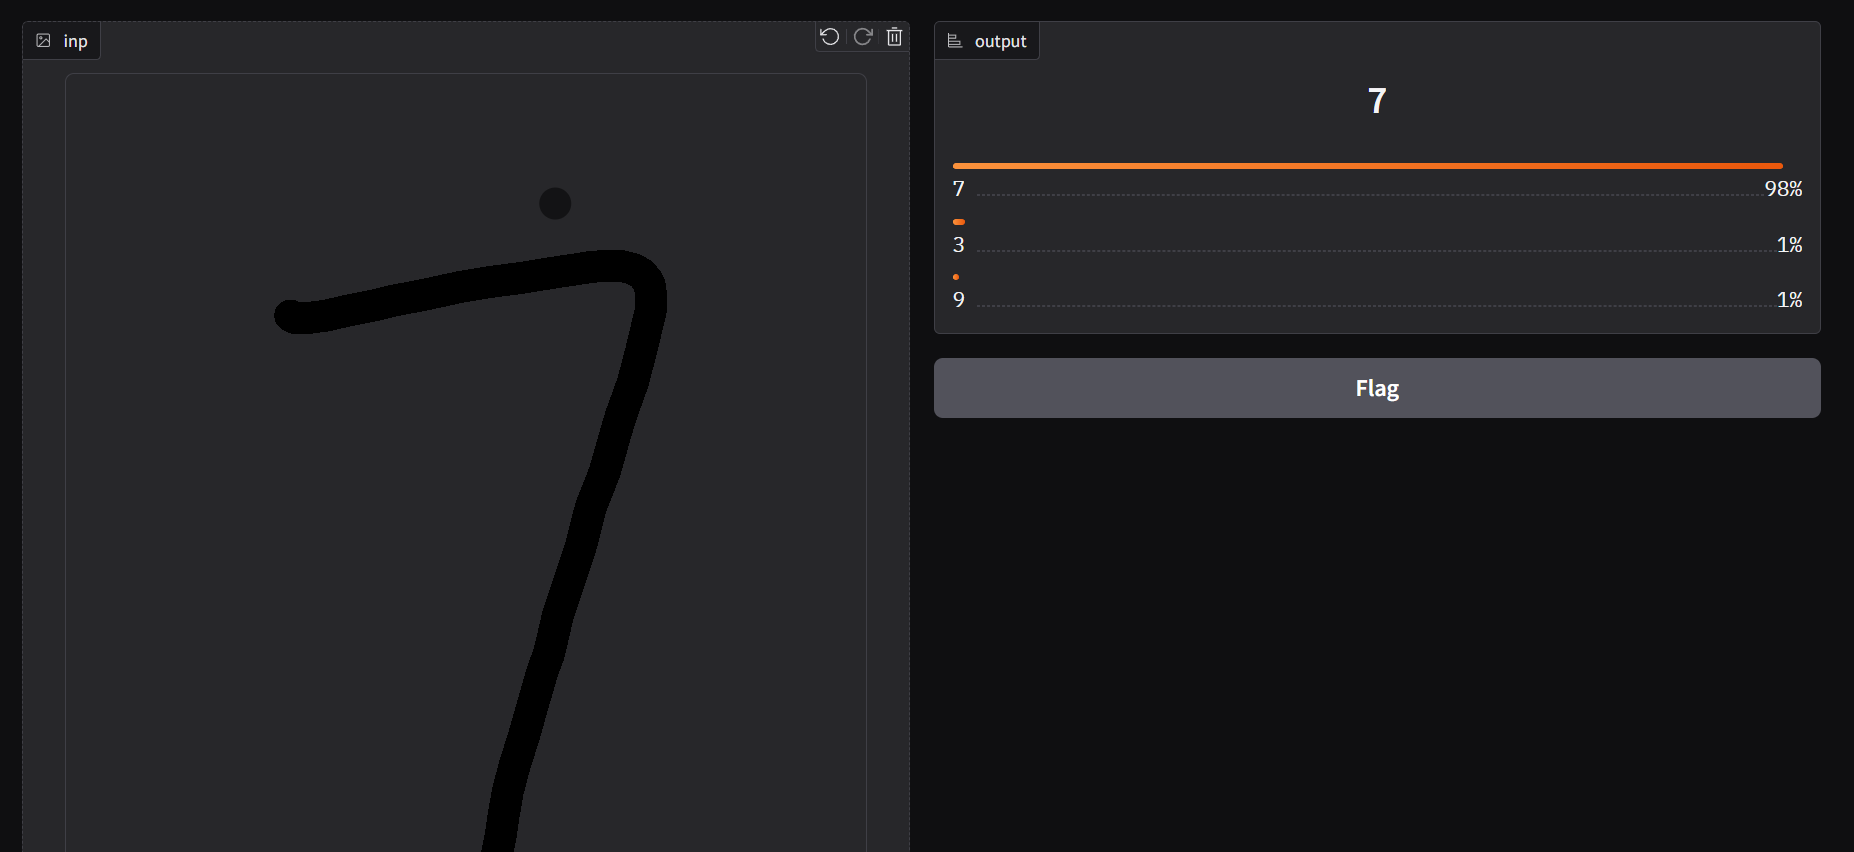